In [1]:
# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")


In [3]:
from PIL import Image
import torch

image = Image.open("image.png")

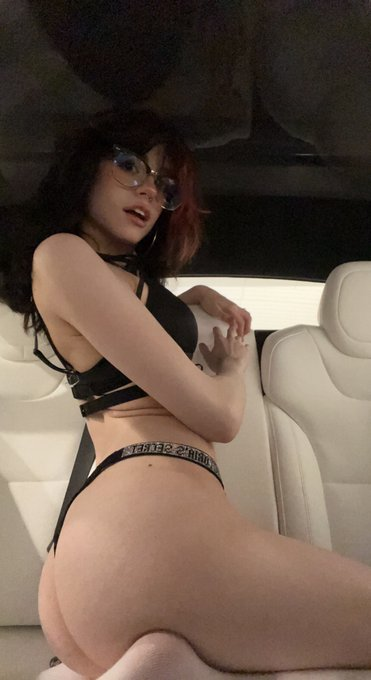

In [4]:
image

In [5]:
model = model.to("cuda")
inputs = processor(images=image, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs)
caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Generated Caption:", caption)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Generated Caption: a woman in a bikini sitting on a white couch 


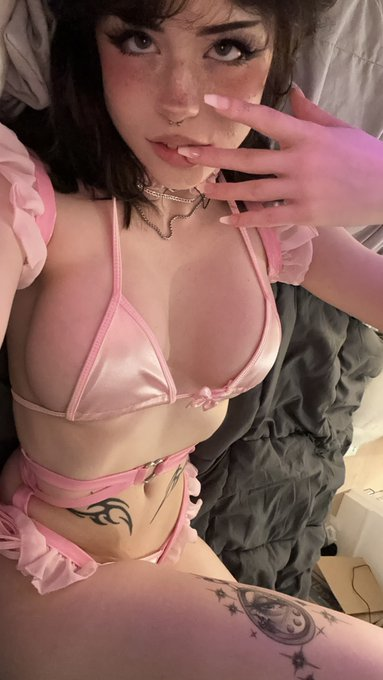

In [6]:
image2= Image.open("image2.png")
image2

In [7]:
# model = model.to("cuda")
inputs = processor(images=image2, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs)
caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Generated Caption:", caption)

Generated Caption: a woman in a bikini is holding a cell phone 
